# 1. Word2Vec
## 1.1 개요
**임페빙**

주어진 데이터를 낮은 차원의 벡터(vector)로 만들어서 표현하는 방법

- Sparse REpresentation : 아이템의 전체 가짓수와 차원의 수가 동일하다.
    - 이진값으로 이루어진 벡터로 표현 : one-hot encoding 또는 multi-hot encoding
        

- Dense Representation : 아이템의 전체 가짓수보다 훨씬 작은 차원으로 표현
    - 이진값이 아닌 실수값으로 이루어진 벡터


**워드 임베딩(Word Embedding)**

: 텍스트 분석을 위해 단어(word)를 벡터로 표현하는 방법
- one-hot encoding(saprse representation) -> dense representation

단어 간 의미적인 유사도를 구할 수 있다.
- 비슷한 의미를 가진 단어일수록 embedding vector가 가까운 위치에 분포한다.
- ex) 예쁘다, 귀엽다, 애교 등의 단어는 비슷한 vector 값을 가질 것으로 예상한다.


임베딩으로 표현하기 위해서는 학습 모델이 필요하다.
- MF도 유저/아이템의 임베딩으로 볼 수 있고, 데이터로부터 학습한 매트릭스가 곧 임베딩이다.

**Word2Vec**

특징
- 뉴럴 네트워크 기반(기존의 NNLM 모델)
- 대량의 문서 데이터셋을 vector 공간에 투영한다.
- 압축된 형태로 많은 의미를 갖는 dense vector로 표현한다.
- 효율적이고 빠른 학습이 가능하다.

학습 방법
- CBOW
- Skip-Gram
- Skip-Gram w/ Negative Sampling(SGNS)
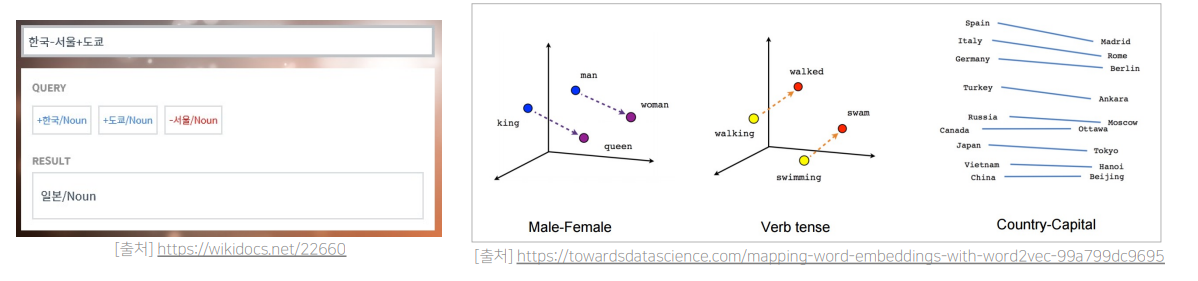

## 1.2 Word2Vec 학습 방법
**Continuous Bag of Words(CBOW)**

주변에 있는 단어를 가지고 센터에 있는 단어를 예측하는 방법

단어를 예측하기 위해 앞뒤로 몇 개(n)의 단어를 사용할 것인지 정해야 한다.
- 윈도우(window)의 크기가 n이라면 실제 예측하기 위해 참고하는 단어는 2n개이다.
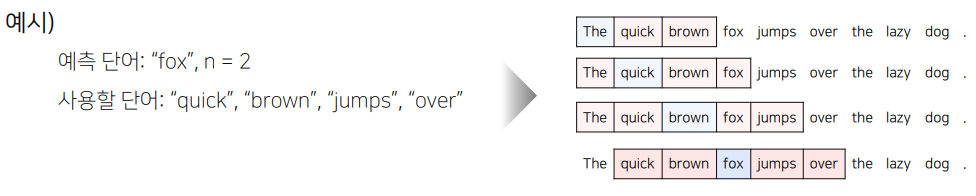

- $V$ : 단어의 총 개수
- $M$ : 임베딩 벡터의 사이즈
- 학습 파라미터 : $W_{V\times M}, W^{'}_{M\times V}$
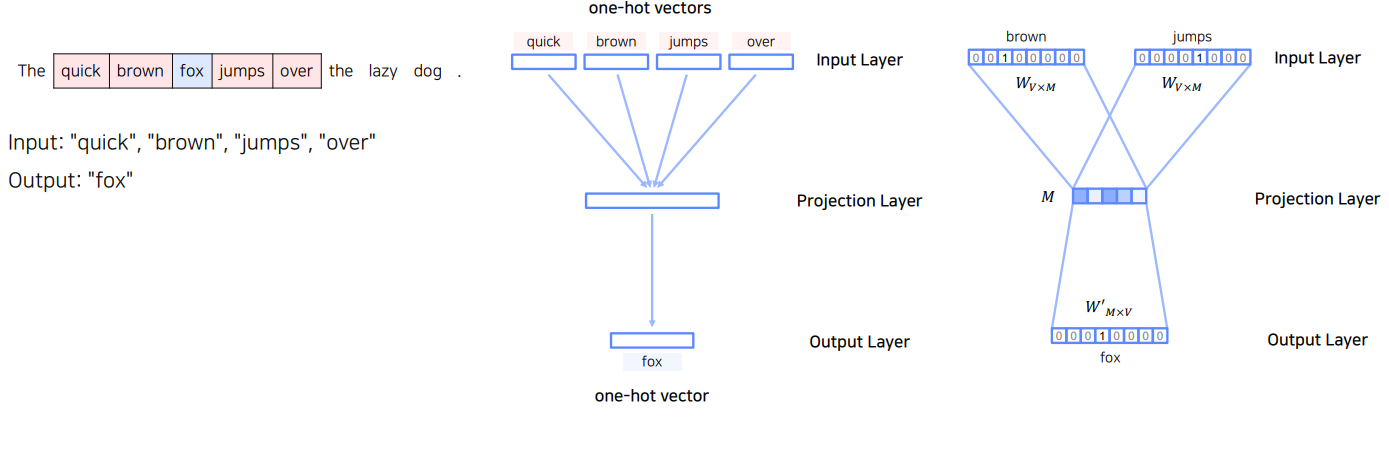

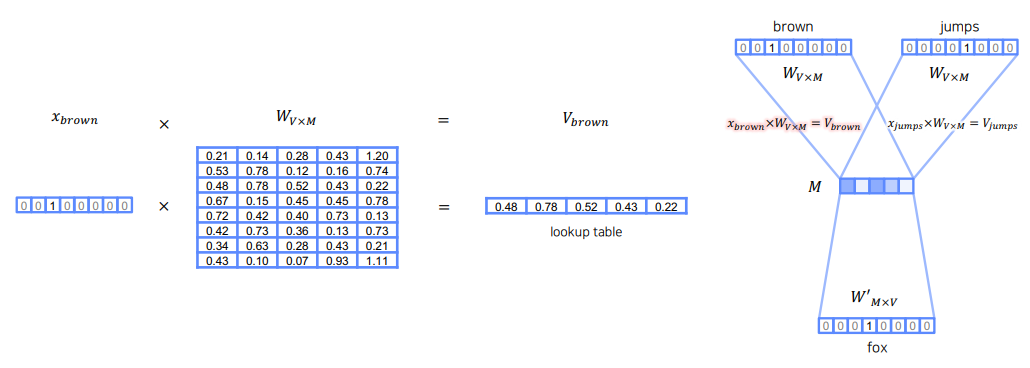


예측값 $\hat{y}$와 one-hot vector $y$의 차이를 최소화하도록 모델을 학습한다.
- 학습 파라미터인 $W_{V\times M}, W^{'}_{M\times V}$가 우리가 사용할 Word2Vec에 해당한다.
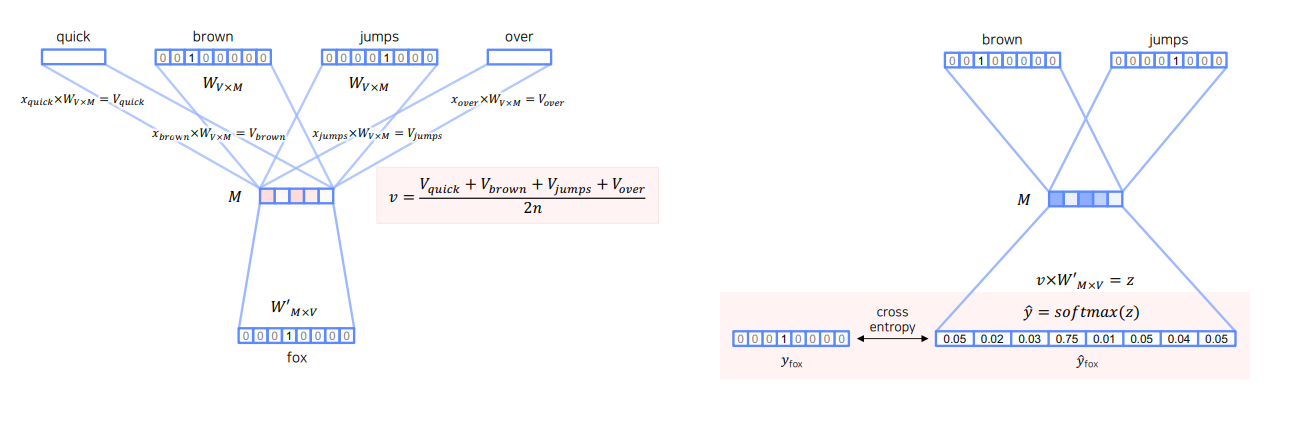

**Skip-Gram**

CBOW의 입력층과 출력층이 반대로 구성된 모델이다. 벡터의 평균을 구하는 과정이 없다.

일반적으로 CBOW보다 Skip-Gram이 성능이 좋다고 알려져 있다.
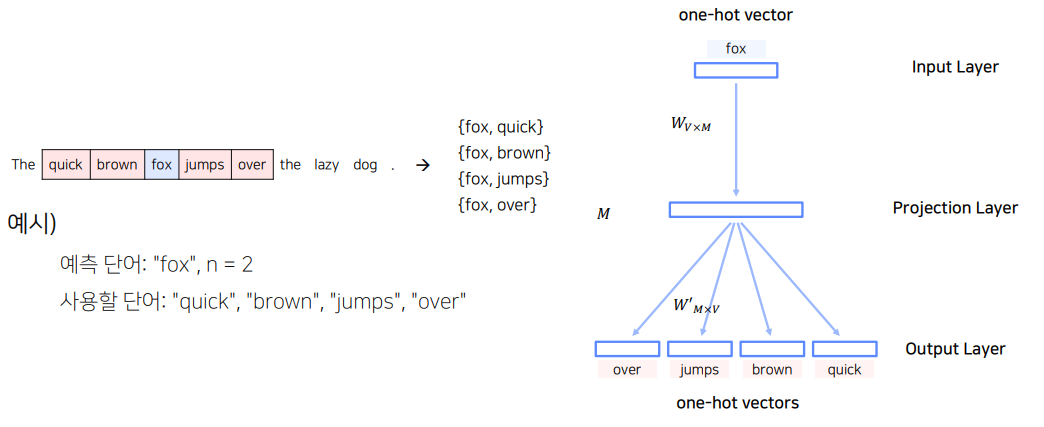

**Skip-Gram with Negative Sampling(SGNS)**
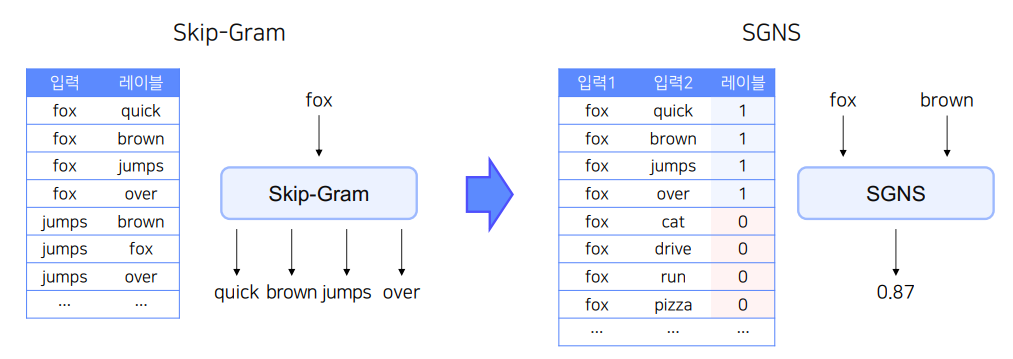

Negative Sampling의 개수를 모델의 하이퍼 파라미터이다.
- positive smaple 하나당 k개를 샘플링한다.
- 학습 데이터가 적은 경우 5-20개, 충분히 큰 경우는 2-5개가 적당하다.
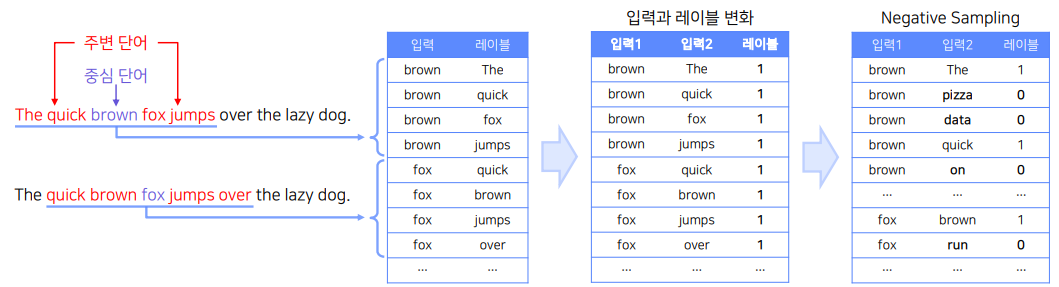

중심 단어와 주변 단어가 각각 임베딩 파라미터를 따로 가진다.
- 중심 단어와 주변 단어가 서로 다른 lookup table을 통해 임베딩된다.
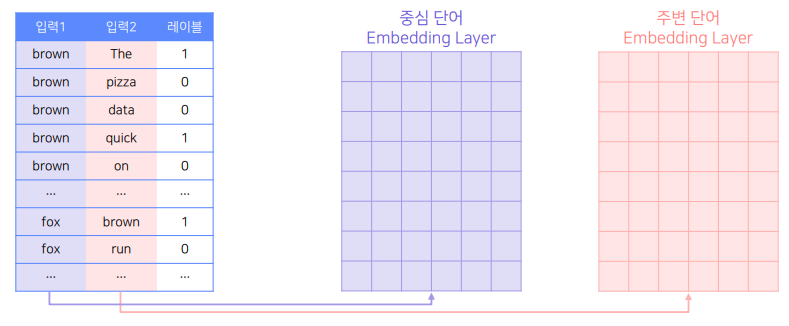

1) 중심 단어를 기준으로 주변 단어들과의 내적의 sigmoid를 예측값으로 하여 0과 1을 분류한다.

2) 역전파(backpropagation)를 통해 각 임베딩이 업데이트 되면서 모델이 수렴한다.

3) 최종 생성된 워드 인베딩이 2개이므로 선택적으로 하나만 사용하거나 평균을 사용한다.
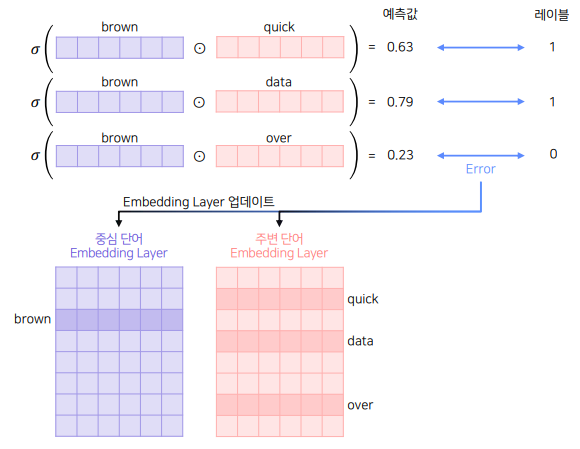

# 2. Item2Vec
## 2.1개요
**Item2Vec**

단어가 아닌 추천 아이템을 Word2Vec을 사용하여 임베딩한다.
- 기존 MF도 유저와 아이템을 임베딩하는 방법이다.
<br><br/>

유저가 소비한 아이템 리스트를 문장으로, 아이템을 단어로 가정하여 Word2Vec 사용한다.
- Item2Vec은 유저-아이템 관계를 사용하지 않기 때문에 유저 식별 없이 세션 단위로도 데이터 생성이 가능하다.
<br><br/>

앞서 배운 SGNS 기반의 Word2Vec을 사용하여 아이템을 벡터화하는 것이 최종 목표이다.
- SGD 기반 MF를 사용한 IBCF보다 Word2Vec이 더 높은 성능과 양질의 추천 결과를 제공한다.

## 2.2 Item2Vec 상세
유저 혹은 세션 별로 소비한 아이템 집합을 생성한다.
- 이 때 시퀀스를 집합으로 바꾸면서 공간적/시간적 정보는 사라진다.
- 대신 집합 안에 존재하는 아이템은 서로 유사하다고 가정한다.
<br><br/>

공간적 정보를 무시하므로 동일한 아이템 집합 내 아이템 쌍들은 모두 SGNS의 Positive Sample이 된다.
- 기존의 Skip-Gram이 주어진 단어 앞뒤로 n개의 단어를 사용한 것과 달리 모든 단어 쌍을 사용한다.
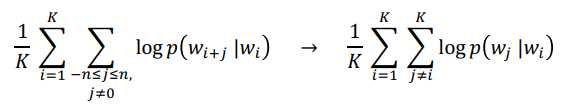

**Item2Vec 예시**
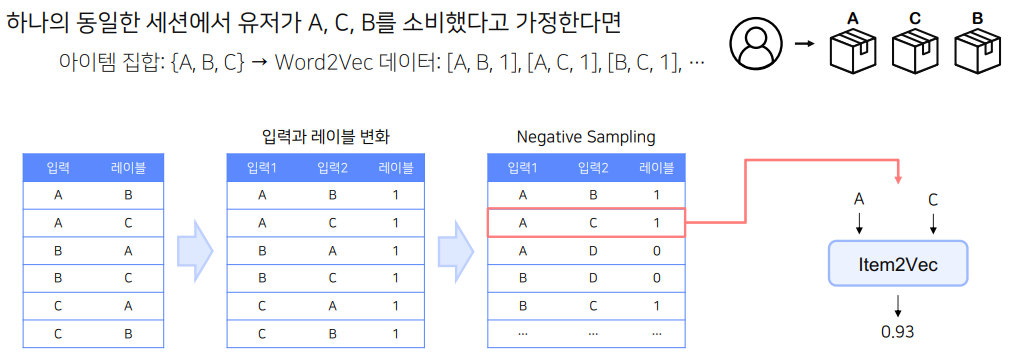

## 2.3 Item2Vec의 적용
**Item2Vec vs. SVD(=MF)**

두 모델의 아이템 벡터를 t-SNE로 임베딩하여 시각화했을 때 비슷한 카테고리(동일 색상)에 대해,

Item2Vec(좌측)의 아이템 벡터 임베딩의 클러스터링 결과가 더 우수하다.
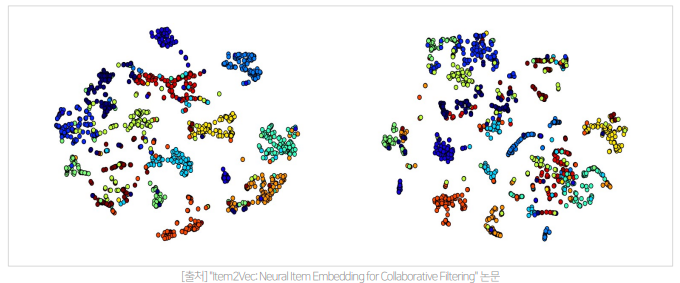

**Item2Vec 활용 사례**

- 아프리카 TV의 Live2Vec
    - [문장] 유저의 시청 이력
    - [단어] 라이브 방송
    

- Spotify의 Song2Vec
    - [문장] 유저의 플레이리스트
    - [단어] 노래
    
    
- Criteo의 Meta-Prod2Vec
    - [문장] 유저의 쇼핑 세션
    - [단어] 상품

# 3. Approximate Nearest Neighbor (ANN)
## 3.1 ANN의 필요성
**Nearest Neighbor(NN)**

Nearest Neighbor(NN)
- Vector Space Model에서 내가 원하는 Query Vector와 가장 유사한 Vector를 찾는 알고리즘이다.
<br><br/>

MF 모델을 가지고 추천 아이템을 서빙한다면?
- 유저에게 아이템 추천 : 해당 유저 Vector와 후보 아이템 Vector들의 유사도 연산이 필요하다.
- 비슷한 아이템 연관 추천 : 해당 아이템 Vector와 다른 모든 후보 아이템 Vector 유사도 연산이 필요하다.
<br><br/>

추천 모델 서빙 = Nearest Neighbor Search
- 모델 학습을 통해 구한 유저/아이템의 Vector가 주어질 때, 주어진 Query Vector의 인접한 이웃을 찾아주는 것이다.

**Brute Force KNN**

NN을 정확하게 구하기 위해서는 나머지 모든 Vector와 유사도 비교를 수행해야 한다.
- Vector의 차원과 개수에 비례한 비교 연산 비용이 필요하다.
- 100차원의 Vector가 100만 개 있을 때, 1개의 Vector의 NN을 구하는데 0.166초가 걸린다.
- 따라서 모든 Vector의 NN을 구하기 위해서는 1,000,000 X 0.166(초) = 166,666.7(초) = 46.30(시간)이 걸린다.
- 계산 결과는 정확하겠지만, 소요 시간으로 인해 현업에서 적용하기 불가능하다.
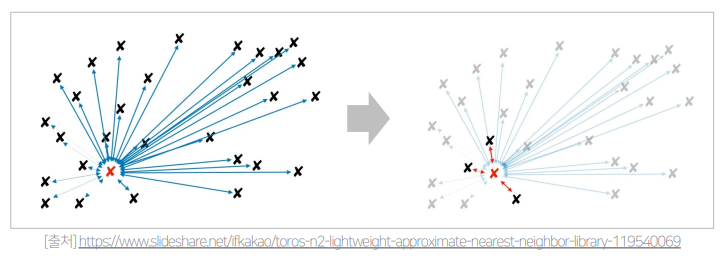
</br><br/>

정확도를 조금 포기하고 아주 빠른 속도로 주어진 Vector의 근접 이웃을 찾는 방법을 연구했다.

**근사 해법의 필요성**

따라서 NN을 정확히 찾는 것이 아닌 Approximate Nearest Neighbor를 찾을 필요성이 높아졌다.
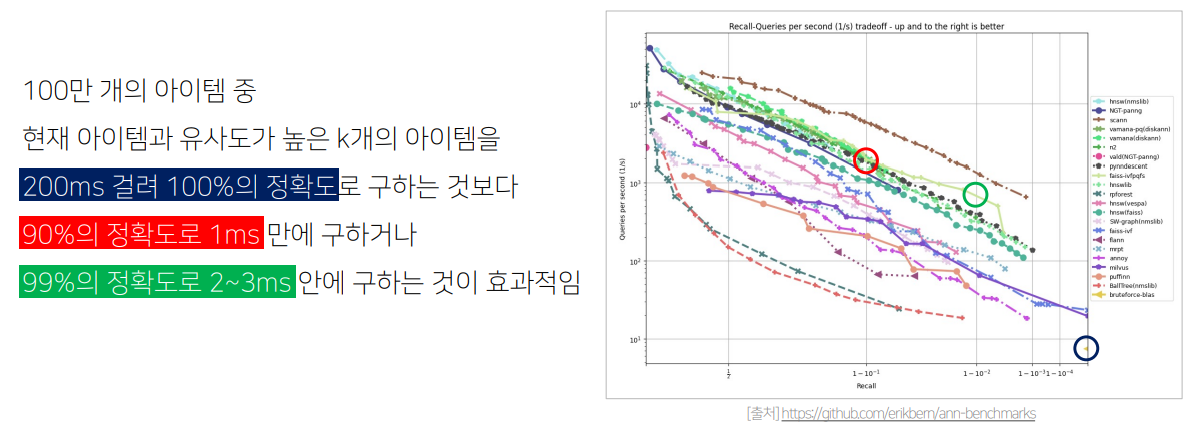

## 3.2 ANNOY
**ANNOY : spotify에서 개발한 tree-based ANN기법**

주어진 벡터들을 여러 개의 subset으로 나누어 tree 형태의 자료 구조로 구성하고 이를 활용하여 탐색한다.

1) Vector Space에서 임의의 두 점을 선택한 뒤, 두 점의 사이의 hyperplane으로 Vector Space를 나눈다.

2) Subspace에 있는 점들의 개수를 node로 하여 binary tree를 생성하거나 갱신한다.

3) Subspace 내에 점이 K개 초과로 존재한다면 해당 Subspace에 대해 1)과 2)를 진행한다.

-> ANN을 구하기 위해서는 현재 점을 binary tree에서 검색한 뒤 해당 subspace에서 NN을 search한다.
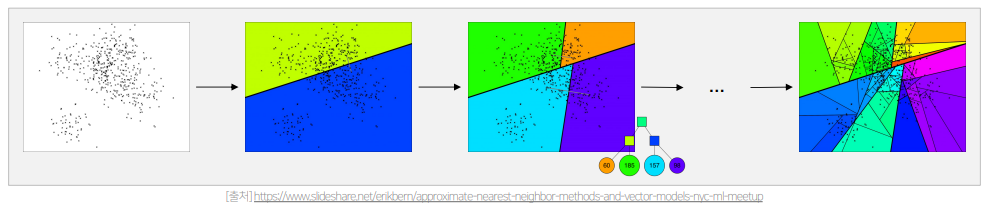
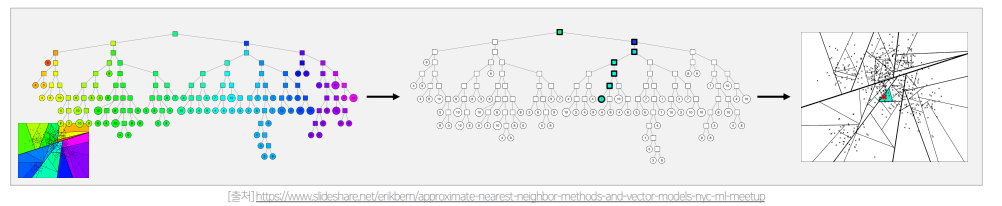

**ANNOY의 문제점 및 해결 방안**

문제점 : 가장 근접한 점이 tree의 다른 node에 있을 경우 해당 점은 후보 subset에 포함되지 못한다.(랜덤으로 나눴기 때문에)
<br><br/>

해결 방안
- 1. priority queue를 사용하여 가까운 다른 node를 탐색한다.(좌)
- 2. binary tree를 여러 개 생성하여 병렬적으로 탐색한다.(우)
<br><br/>

Annoy parameter
- 1. number_of_trees : 생성하는 binary tree의 개수(우)
- 2. search_k : NN을 구할 때 탐색하는 node의 개수(좌)
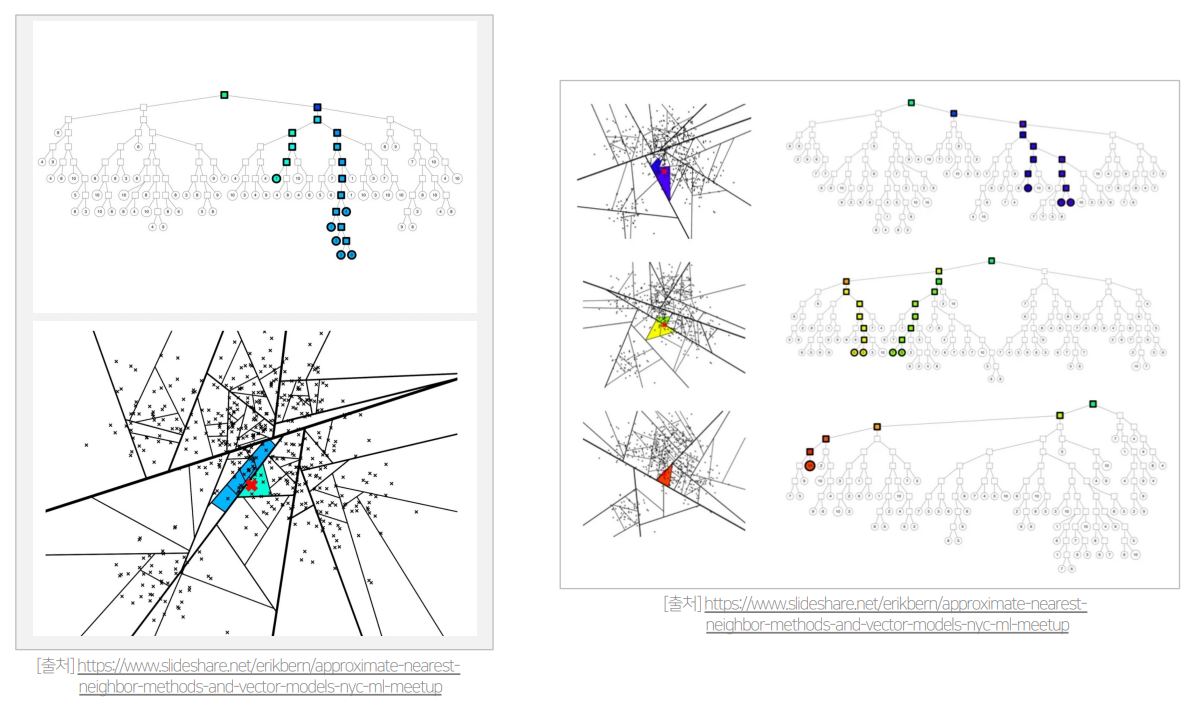

**요약 및 특징**

1. Search Index를 생성하는 것이 다른 ANN 기법에 비해 간단하고 가볍다.
- 아이템 개수가 많지 않고 벡터의 차원(d < 100)이 낮은 경우 사용하기에 적합하다.
- GPU 연산은 지원하지 않는다.

2. Search 해야 할 이웃의 개수를 알고리즘이 보장한다.

3. 파라미터 조정을 통해 Accuracy / Speed trade-off 조정이 가능하다(num_tree, search_k)

4. 단, 기존 생성된 binary tree에 새로운 데이터를 추가할 수 없다.(추가되면 다시 트리를 구성해야 한다.)

## 3.3 기타 ANN 기법
**Hierarchical navigable Small World Graphs(HNSW)**

- 벡터를 그래프의 node로 표현하고 인접한 벡터를 edge로 연결

Layer를 여러 개 만들어 계층적으로 탐색을 진행 -> search 속도 향상

Layer 0에 모든 노드가 존재, 최상위 Layer로 갈수록 개수가 적음 (랜덤 샘플링)
<br></br>
- 작동 방식

1) 최상위 Layer에서 임의의 노드에서 시작

2) 현재 Layer에서 타겟 노드와 가장 가까운 노드로 이동

3) 현재 Layer에서 더 가까워 질 수 없다면 하위 Layer로 이동

4) 타겟 노드에 도착할 때까지 2)와 3) 반복

5) 2) ~ 4)를 진행할 때 방문했던(traverse) 노드들만 후보로 하여 NN을 탐색
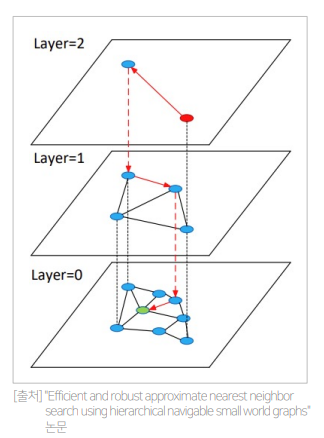